# <center> MNist database classification<br> <small>Réda DEHAK<br> 1 July 2020</small> </center>

The goal of this lab is :
    - Evaluate your understanding of the course
    - Try and make a comparison of different machine learning methods
    
This study is based on the <A href=http://yann.lecun.com/exdb/mnist/>MNist dataset</A>. It is handwritten digits dataset with a training set of 60000 samples, and a test set of 10000 samples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

## Questions:

- propose three different approaches to classify the MNist dataset. Compare the performance of each method and suggest solutions to improve the performance of each one. You can use all methods that you learned or not during the MSc. The goal is to obtain the best performances measure.
- Make a video of 5 minutes maximum to justify your choices and explain your results.
- Download the notebook and video on Teams before July 21th.

### Load the dataset
- MNist dataset is proposed in keras.datasets toolbox, you can use this code to load the dataset or use the function mnist_load_data provided in mnist.py file

In [21]:
from keras.datasets import mnist
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

#from mnist import mnist_load_data
#(Xtrain, ytrain), (Xtest, ytest) = mnist_load_data()
print('train: ', Xtrain.shape)
print('Test: ', Xtest.shape)

train:  (60000, 28, 28)
Test:  (10000, 28, 28)


## First Method: Artificial Neural Networks

....

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [23]:
Xtrain_784 = Xtrain.copy()
Xtest_784 = Xtest.copy()

Xtrain_784 = Xtrain_784.reshape(((60000, -1)))
Xtest_784 = Xtest_784.reshape(((10000, -1)))

Xtrain_784 = Xtrain_784/255
Xtest_784 = Xtest_784/255

Xtrain_784.shape, Xtest_784.shape

((60000, 784), (10000, 784))

In [30]:
def create_ann_model():
    ann_model = Sequential()
    ann_model.add(Dense(512, activation='relu', input_shape=(784,)))
    ann_model.add(Dropout(0.2))
    ann_model.add(Dense(512, activation='relu'))
    ann_model.add(Dropout(0.2))
    ann_model.add(Dense(10, activation='softmax'))
    return ann_model

In [31]:
ann_clf = create_ann_model()

In [32]:
ann_clf.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [33]:
ann_clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
ann_clf.fit(Xtrain_784, ytrain, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 28s 459us/step - loss: 0.2137 - accuracy: 0.9341
Epoch 2/5
60000/60000 [==============================] - 26s 440us/step - loss: 0.1072 - accuracy: 0.9671
Epoch 3/5
60000/60000 [==============================] - 29s 491us/step - loss: 0.0814 - accuracy: 0.9746
Epoch 4/5
60000/60000 [==============================] - 29s 491us/step - loss: 0.0657 - accuracy: 0.9792
Epoch 5/5
60000/60000 [==============================] - 26s 432us/step - loss: 0.0579 - accuracy: 0.9818


In [59]:
ann_test_loss, ann_test_acc = ann_clf.evaluate(Xtest_784, ytest)

print('Test accuracy:', ann_test_acc)

10000/10000 [==============================] - 1s 85us/step
Test accuracy: 0.9807000160217285


In [43]:
ann_predictions = ann_clf.predict(Xtest_784)

In [44]:
ann_predictions[0]

array([7.7961574e-13, 1.8834490e-09, 4.3866343e-08, 8.4590070e-08,
       4.1562459e-13, 5.3768538e-11, 3.0506760e-15, 9.9999917e-01,
       4.8490134e-10, 7.2402491e-07], dtype=float32)

In [45]:
np.argmax(ann_predictions[0])

7

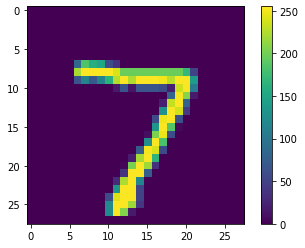

In [48]:
plt.figure()
plt.imshow(Xtest[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [127]:
import numpy as np
from sklearn.metrics import confusion_matrix
ann_ypred = np.argmax(ann_predictions, axis=1)
confusion_matrix(ytest, ann_ypred)

array([[ 970,    1,    3,    0,    1,    0,    2,    1,    2,    0],
       [   0, 1114,    3,    1,    0,    0,    4,    0,   13,    0],
       [   1,    0, 1015,    2,    3,    0,    4,    2,    5,    0],
       [   0,    0,    9,  990,    0,    1,    0,    3,    3,    4],
       [   2,    0,    2,    0,  958,    0,    3,    0,    0,   17],
       [   1,    1,    1,    6,    1,  867,    4,    0,    9,    2],
       [   1,    2,    0,    1,    7,    2,  941,    0,    4,    0],
       [   0,    3,    5,    6,    0,    0,    0, 1003,    5,    6],
       [   1,    0,    6,    1,    3,    0,    0,    2,  959,    2],
       [   2,    2,    1,    4,    3,    1,    0,    2,    4,  990]],
      dtype=int64)

## Second Method: Convolutional Neural Networks

....

In [52]:
Xtrain_28 = Xtrain.copy()
Xtest_28 = Xtest.copy()

Xtrain_28 = Xtrain_28.reshape(60000, 28, 28, 1)
Xtest_28 = Xtest_28.reshape(10000, 28, 28, 1)

Xtrain_28 = Xtrain_28/255
Xtest_28 = Xtest_28/255

Xtrain_28.shape, Xtest_28.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [53]:
def create_cnn_model():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu')) 
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Conv2D(15, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Flatten())

    cnn_model.add(Dense(500, activation='relu', name='my_dense'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(10, activation='softmax'))
    return cnn_model

In [54]:
cnn_clf = create_cnn_model()

In [56]:
cnn_clf.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
my_dense (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_8 (Dropout)          (None, 500)              

In [55]:
cnn_clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
cnn_clf.fit(Xtrain_28, ytrain, validation_split=0.1, epochs=10, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 27s 501us/step - loss: 0.3344 - accuracy: 0.8973 - val_loss: 0.0772 - val_accuracy: 0.9787
Epoch 2/10
54000/54000 [==============================] - 26s 484us/step - loss: 0.0905 - accuracy: 0.9723 - val_loss: 0.0518 - val_accuracy: 0.9860
Epoch 3/10
54000/54000 [==============================] - 26s 477us/step - loss: 0.0664 - accuracy: 0.9792 - val_loss: 0.0418 - val_accuracy: 0.9877
Epoch 4/10
54000/54000 [==============================] - 25s 465us/step - loss: 0.0516 - accuracy: 0.9833 - val_loss: 0.0417 - val_accuracy: 0.9885
Epoch 5/10
54000/54000 [==============================] - 25s 471us/step - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.0360 - val_accuracy: 0.9892
Epoch 6/10
54000/54000 [==============================] - 26s 477us/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0362 - val_accuracy: 0.9905
Epoch 7/10
54000/54000 [==============================] -

In [60]:
cnn_test_loss, cnn_test_acc = cnn_clf.evaluate(Xtest_28, ytest)

print('Test accuracy:', cnn_test_acc)

10000/10000 [==============================] - 2s 183us/step
Test accuracy: 0.9930999875068665


In [61]:
cnn_predictions = cnn_clf.predict(Xtest_28)

In [62]:
cnn_predictions[0]

array([1.4361383e-11, 3.3114276e-09, 2.0160522e-08, 1.6496585e-06,
       1.1466830e-11, 4.8768132e-11, 2.0437378e-16, 9.9999821e-01,
       3.1392897e-09, 8.8832188e-08], dtype=float32)

In [63]:
np.argmax(cnn_predictions[0])

7

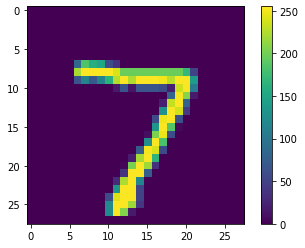

In [64]:
plt.figure()
plt.imshow(Xtest[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [128]:
cnn_ypred = np.argmax(cnn_predictions, axis=1)
confusion_matrix(ytest, cnn_ypred)

array([[ 977,    0,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1130,    1,    0,    0,    2,    1,    0,    1,    0],
       [   0,    1, 1026,    0,    0,    0,    1,    3,    1,    0],
       [   0,    0,    1, 1004,    0,    2,    0,    1,    2,    0],
       [   0,    0,    0,    0,  978,    0,    2,    0,    0,    2],
       [   1,    0,    0,    7,    0,  883,    1,    0,    0,    0],
       [   2,    2,    0,    0,    1,    4,  948,    0,    1,    0],
       [   0,    2,    2,    0,    0,    0,    0, 1022,    1,    1],
       [   1,    0,    3,    2,    0,    0,    0,    1,  967,    0],
       [   0,    0,    0,    0,    8,    2,    0,    3,    0,  996]],
      dtype=int64)

## Third Method: XGBoost

....

In [103]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(objective='multi:softprob', num_class= 10)

In [106]:
xgb_clf.fit(Xtrain_784, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=10, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
xgb_clf.score(Xtest_784, ytest)

0.978

In [108]:
xgb_clf_predictions = xgb_clf.predict(Xtest_784)

In [115]:
xgb_clf_predictions[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [129]:
confusion_matrix(ytest, xgb_clf_predictions)

array([[ 969,    1,    0,    0,    0,    3,    4,    1,    2,    0],
       [   1, 1124,    2,    3,    0,    1,    3,    1,    0,    0],
       [   5,    0, 1006,    9,    1,    0,    0,    5,    5,    1],
       [   0,    0,    2,  992,    0,    3,    0,    6,    4,    3],
       [   0,    0,    3,    0,  957,    0,    4,    1,    2,   15],
       [   2,    0,    1,    5,    0,  869,    6,    3,    4,    2],
       [   7,    3,    0,    0,    2,    3,  939,    0,    4,    0],
       [   1,    1,   14,    3,    2,    0,    0,  998,    2,    7],
       [   4,    1,    3,    2,    3,    3,    2,    2,  948,    6],
       [   6,    5,    1,    5,    7,    1,    0,    3,    3,  978]],
      dtype=int64)

## Fourth Method: Hybrid Model - CNN + XGBoost

....

In [67]:
import pandas as pd

In [66]:
from keras.models import Model
layer_name='my_dense'
intermediate_layer_model = Model(inputs=cnn_clf.input, outputs=cnn_clf.get_layer(layer_name).output)
intermediate_layer_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
my_dense (Dense)             (None, 500)               1880

In [73]:
intermediate_output = intermediate_layer_model.predict(Xtrain_28) 
intermediate_output = pd.DataFrame(data=intermediate_output)

In [74]:
intermediate_test_output = intermediate_layer_model.predict(Xtest_28)
intermediate_test_output = pd.DataFrame(data=intermediate_test_output)

In [75]:
from xgboost import XGBClassifier

xgbmodel = XGBClassifier(objective='multi:softprob', num_class= 10)

In [76]:
xgbmodel.fit(intermediate_output, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=10, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
xgbmodel.score(intermediate_test_output, ytest)

0.9916

In [78]:
xgb_predictions = xgbmodel.predict(intermediate_test_output)

In [84]:
xgb_predictions[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [130]:
confusion_matrix(ytest, xgb_predictions)

array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1130,    1,    0,    0,    1,    1,    0,    2,    0],
       [   1,    0, 1024,    0,    1,    0,    0,    3,    2,    1],
       [   0,    0,    2, 1004,    0,    2,    0,    1,    1,    0],
       [   0,    0,    1,    0,  974,    0,    3,    1,    0,    3],
       [   0,    0,    0,    6,    0,  885,    1,    0,    0,    0],
       [   4,    3,    0,    0,    1,    5,  944,    0,    1,    0],
       [   0,    3,    4,    0,    0,    0,    0, 1018,    1,    2],
       [   3,    0,    3,    2,    0,    0,    0,    1,  963,    2],
       [   0,    1,    0,    1,    5,    1,    0,    2,    3,  996]],
      dtype=int64)

## Fifth Method: Ensemble learning (SVM, GNB, Random Forest)

....

In [110]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [111]:
random_forest = RandomForestClassifier(n_estimators=50, random_state=1)
nb = GaussianNB()
svm = SVC(probability=True, random_state=1)

In [112]:
vc_hard_clf = VotingClassifier(estimators=[('svm', svm), ('gnb', nb), ('RandomForestClassifier', random_forest)], voting='hard')

In [113]:
vc_hard_clf = vc_hard_clf.fit(Xtrain_784, ytrain)

In [114]:
vc_hard_clf.score(Xtest_784, ytest)

0.9706

In [131]:
hard_clf_ypred = vc_hard_clf.predict(Xtest_784)

In [132]:
confusion_matrix(ytest, hard_clf_ypred)

array([[ 970,    0,    0,    0,    0,    2,    3,    1,    3,    1],
       [   0, 1126,    3,    1,    0,    1,    2,    0,    2,    0],
       [   9,    2,  999,    3,    1,    0,    3,    8,    7,    0],
       [   0,    1,    7,  984,    0,    3,    0,    5,    5,    5],
       [   2,    1,    3,    0,  952,    0,    5,    0,    2,   17],
       [   7,    1,    0,   12,    5,  855,    4,    1,    5,    2],
       [   7,    2,    0,    0,    3,    4,  941,    0,    1,    0],
       [   1,    9,   17,    3,    0,    0,    0,  977,    5,   16],
       [   6,    0,    3,    7,    7,    2,    2,    4,  934,    9],
       [   6,    6,    1,    8,    9,    2,    1,    1,    7,  968]],
      dtype=int64)

In [116]:
vc_soft_clf = VotingClassifier(estimators=[('svm', svm), ('gnb', nb), ('RandomForestClassifier', random_forest)], voting='soft')

In [117]:
vc_soft_clf = vc_soft_clf.fit(Xtrain_784, ytrain)

In [118]:
vc_soft_clf.score(Xtest_784, ytest)

0.9625

In [133]:
soft_clf_ypred = vc_soft_clf.predict(Xtest_784)

In [134]:
confusion_matrix(ytest, soft_clf_ypred)

array([[ 966,    0,    0,    0,    1,    0,    5,    1,    5,    2],
       [   0, 1124,    1,    2,    0,    1,    4,    0,    2,    1],
       [  11,    2,  982,    4,    0,    0,    3,    7,   17,    6],
       [   0,    2,    2,  971,    0,    3,    0,    7,   13,   12],
       [   1,    1,    0,    0,  928,    0,    9,    0,    7,   36],
       [   8,    3,    1,    7,    1,  845,    6,    0,   12,    9],
       [   9,    2,    1,    0,    2,    2,  933,    0,    8,    1],
       [   0,    8,    7,    4,    1,    0,    1,  968,    9,   30],
       [   7,    0,    1,    3,    0,    2,    7,    3,  933,   18],
       [   5,    6,    2,    6,    4,    0,    0,    2,    9,  975]],
      dtype=int64)

## Sixth Method: Hybrid Ensemble Learning - CNN + Ensemble learning (SVM, GNB, Random Forest)

....

In [87]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [88]:
random_forest_clf = RandomForestClassifier(n_estimators=50, random_state=1)
nb_clf = GaussianNB()
svm_clf = SVC(probability=True, random_state=1)

In [95]:
vc_hard = VotingClassifier(estimators=[('svm', svm_clf), ('gnb', nb_clf), ('RandomForestClassifier', random_forest_clf)], voting='hard')

In [96]:
vc_hard = vc_hard.fit(intermediate_output, ytrain)

In [97]:
vc_hard.score(intermediate_test_output, ytest)

0.9924

In [135]:
hard_ypred = vc_hard.predict(intermediate_test_output)

In [136]:
confusion_matrix(ytest, hard_ypred)

array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1132,    1,    0,    0,    0,    1,    0,    1,    0],
       [   0,    1, 1027,    0,    0,    0,    0,    3,    1,    0],
       [   0,    0,    2, 1003,    0,    2,    0,    1,    2,    0],
       [   0,    0,    1,    0,  975,    0,    2,    0,    0,    4],
       [   1,    0,    0,    4,    0,  886,    1,    0,    0,    0],
       [   2,    3,    0,    0,    1,    3,  949,    0,    0,    0],
       [   0,    3,    4,    0,    0,    0,    0, 1020,    1,    0],
       [   1,    0,    2,    2,    1,    0,    0,    1,  964,    3],
       [   3,    1,    0,    1,    6,    3,    0,    4,    0,  991]],
      dtype=int64)

In [99]:
vc_soft = VotingClassifier(estimators=[('svm', svm_clf), ('gnb', nb_clf), ('RandomForestClassifier', random_forest_clf)], voting='soft')

In [100]:
vc_soft = vc_soft.fit(intermediate_output, ytrain)

In [101]:
vc_soft.score(intermediate_test_output, ytest)

0.9904

In [137]:
soft_ypred = vc_soft.predict(intermediate_test_output)

In [138]:
confusion_matrix(ytest, soft_ypred)

array([[ 976,    0,    0,    0,    0,    0,    1,    1,    2,    0],
       [   0, 1130,    1,    0,    0,    1,    2,    0,    1,    0],
       [   0,    2, 1024,    0,    0,    0,    1,    4,    1,    0],
       [   0,    0,    3, 1000,    0,    2,    0,    2,    2,    1],
       [   0,    0,    0,    0,  977,    0,    2,    0,    0,    3],
       [   0,    0,    0,    4,    0,  886,    1,    1,    0,    0],
       [   4,    3,    0,    0,    1,    3,  947,    0,    0,    0],
       [   0,    3,    5,    0,    0,    0,    0, 1019,    0,    1],
       [   1,    0,    3,    1,    1,    2,    1,    1,  961,    3],
       [   3,    1,    0,    2,    7,    5,    0,    7,    0,  984]],
      dtype=int64)

## Comparison

When large amount of data is available, multi-layered deep learning models always have an upper hand over the traditional single layered machine learning models. So, for our problem statement, I started with Artificial Neural Networks.

Using ANN, I was able to achive 98.07% accuracy on test dataset. But in ANN, the complete input was given as input to the hidden layers. When compared to ANN, CNN had a better approach.   

CNN applies the convolution with a learnable filter (a.k.a. kernel). As a result the network learns the patterns in the images: edges, corners, arcs, then more complex figures. Convolutional neural network may contain other layers as well, commonly pooling and dense layers and this gave me the best result with 99.3% accuracy on test dataset.

Although, XGBoost isn't very good with images, it gave a decent result of 97.8% accuracy on test dataset. But, it took atleast 30-40 mins to do the computation. Therefore, to make it better, a hybrid model, CNN-XGBoost was implemented. Feature extraction is an important aspect while working with images. So, the intermediate result from the CNN was given as input to the XGBoost model. This reduced the computation time to 10 mins, as well as increased the accuracy to 99.16%.

Ensemble learning method took almost two hours to do the computation of both hard voting & soft voting classifiers, and the results weren't very great. More over, it took time even to do the prediction. (In general, when compared to machine learning models, deep learning models are able to predict faster, even though they take time to train.) To tackle this issue, again a hybrid methods was used. The intermediate result from the CNN was given as input to the Ensemble learning model, and this resulted in a better accuracy of 99.24% for hard voting classifier and 99.04% for soft voting classifier, while reducing the computation time to less than 30 mins.

## Conclusions and Perspectives:

Only deep learning methods are capable of absorbing huge amounts of training data, without any saturation in performance. So when we don't have large amounts of training examples, i.e., in the 100k or 1000k range, alternatives to deep learning methods are superior in performance. 

In some cases, we might even have big data available, but the function that we are trying to model might be so simple, that a small subset of that data is enough to learn it - here computational considerations + experimental cycle times might cause us to prefer XGBoost kind of models. XGBoost gives superior accuracy on many problems and has nice computational characteristics, but it's not so much greater than many other traditional methods like kernel SVMs or random forests, as deep learning methods are. 

Ensemble learning is a kind of bagging technique. If we have models with high variance, then we are likely to benefit from using bagging. But incase of bias, it's better to use boosting.

So it's always better to choose a model / stratergy depending on the data and the problem at hand. In case of image based problems, I would always give a thought about Convolutional Neural Networks and might prefer it.